<a href="https://colab.research.google.com/github/venusinfire/SenalesySistemas2023-2/blob/main/Parciales/Parcial1bSe%C3%B1aleySistemasLaura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

:Se tiene un microprocesador de 3 bits con entrada analoga de -3.3 a 5 [v]. Diseñe el sistema de acondicionamiento y digitalizacion para la señal: $x(t) = 20 sin(5t−π/2) − 2 cos(5t) + 2 cos(10t)$. Presente las simulaciones
y graficas de los procedimientos más representativos en un cuaderno de Python, incluyendo al menos dos periodos de la
senal estudiada.

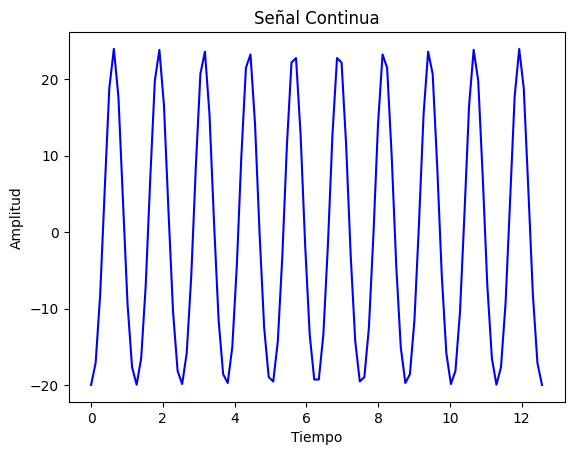

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Definición del período fundamental y frecuencia
To = 2 * np.pi
F = 1 / To
A = 20

# Definición de las frecuencias angulares de las componentes sinusoidales
omega1 = 5
omega2 = 5
omega3 = 10

# Definición de la frecuencia de muestreo y el período de muestreo
Fs = F * 30  # Cumple con el teorema de Nyquist (Fs es la frecuencia de muestreo)
Ts = 1 / Fs

# Creación de un vector de tiempo para 2 periodos de la señal y definición de la función
tv = np.linspace(0, 2 * To, 100)
x = 20 * np.sin(omega1 * tv - np.pi / 2) - 2 * np.cos(omega2 * tv) + 2 * np.cos(omega3 * tv)

plt.plot(tv, x, 'b')
plt.title('Señal Continua')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo')
plt.show()


<ipython-input-31-01ae5c30d882>:8: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(td, yd, use_line_collection=True)


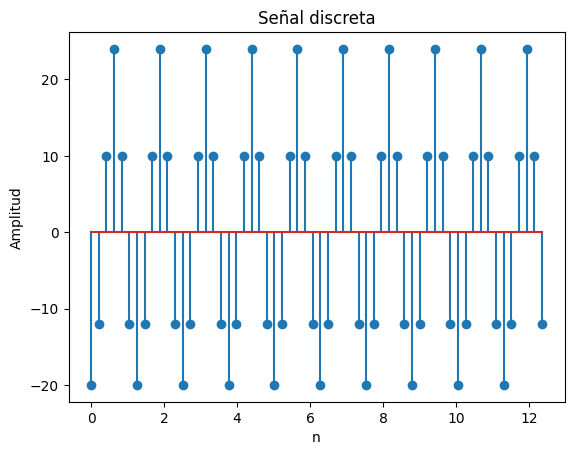

In [ ]:
# La función np.arange() crea un vector que contiene valores desde 0 hasta 2*To con pasos de Ts.
td = np.arange(0,2*To,Ts)
# Definición de la señal discreta
yd = 20 * np.sin(omega1 * td - np.pi / 2) - 2 * np.cos(omega2 * td) + 2 * np.cos(omega3 * td)
# Se calcula la señal discreta utilizando las mismas componentes sinusoidales que la señal continua.

# Graficar la señal discreta utilizando (stem plot)
plt.stem(td, yd, use_line_collection=True)
# plt.stem() para mostrar las muestras discretas.
plt.title('Señal discreta')
plt.ylabel('Amplitud')
plt.xlabel('n')
plt.show()

<ipython-input-36-4ff7bf4f7bb1>:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(td, yv, use_line_collection=True)


Text(0.5, 0, 'n')

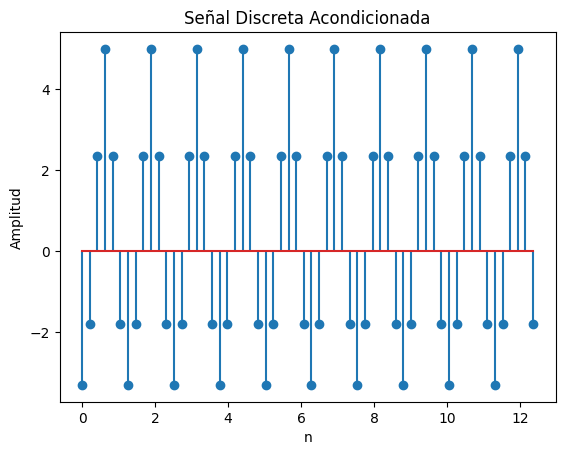

In [ ]:
# cero y pendiente
def my_ceropen(x, ymin=-3.3, ymax=5):

    xmax = max(x)  # x.max()
    xmin = min(x)  # x.min()

    # Calcular la pendiente (m) y la constante (c) para el proceso de cero y pendiente
    m = (ymax - ymin) / (xmax - xmin)
    c = ymin - m * xmin


    # Aplicar el proceso de cero y pendiente a la señal
    yv = m * x + c
    return yv

# Llamar a la función para acondicionar la señal discreta y obtener la señal acondicionada
yv = my_ceropen(yd, ymin=-3.3, ymax=5)

# Graficar la señal discreta acondicionada
plt.stem(td, yv, use_line_collection=True)
# Utilizamos plt.stem() nuevamente para mostrar las muestras discretas acondicionadas.

plt.title('Señal Discreta Acondicionada')
plt.ylabel('Amplitud')
plt.xlabel('n')



In [ ]:
# Definición de una función para realizar la conversión digital
def digital_conv(bits: int, ymin: int, ymax: int, y: any):
    # Calcula los estados posibles dentro del rango ymin y ymax
    states = np.linspace(ymin, ymax, 2**bits)


    d = cdist(y.reshape(-1, 1), states.reshape(-1, 1))
    ind = np.argmin(d, axis=1)
    return states[ind]

# Definir los límites de amplitud de entrada
inmin = -3.3
inmax = 5

# Aplicar el proceso de cero y pendiente a la señal discreta
yv = my_ceropen(yd, ymin=-3.3, ymax=5)

# Inicializar un arreglo para almacenar la señal digital resultante
ydgt = []

# Convertir cada muestra de la señal a su equivalente digital
for i in range(yv.shape[0]):
    if i == 0:
        ydgt = digital_conv(4, inmin, inmax, yv[i])
    else:
        ydgt = np.append(ydgt, digital_conv(3, inmin, inmax, yv[i]))

# Graficar los estados posibles en el eje temporal
for v in np.linspace(inmin, inmax, 2**3):
    plt.plot(tv, v * np.ones(len(tv)))


plt.stem(td, ydgt)
plt.title('Señal Digital')
plt.ylabel('Amplitud Digital')
plt.xlabel('n')
plt.grid()
plt.show()
